In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, silhouette_score, SCORERS, f1_score
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# SMOTE
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC

import warnings
warnings.filterwarnings("ignore")

import time

In [95]:
report=[]
n=0

In [196]:
# Linear Models
train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train3= pd.read_csv('train_3.csv')
train4=pd.merge(train1,train2,how='outer')
train=pd.merge(train4,train3,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                 'X8','X9','X10','X11','X12','X13','X14',
                                 'X15','X16','X17','X18','X19','X20','X21','X22','X23']]

x_test.columns=['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']

#x_resampled,y_resampled=SMOTE(sampling_strategy=i).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)

#x_t=pd.concat([x_train,x_test])
#cluster = KMeans(n_clusters=3).fit_predict(x_t)
#x_t['cluster']=cluster
#x_train=x_t.iloc[:21600,:]
#x_test=x_t.iloc[21600:,:]

x_t=pd.concat([x_train,x_test])
for col in ['repayment status in September','repayment status in August', 'repayment status in july',
            'repayment status in june', 'repayment status in may','repayment status in april']:
    x_t[col+'=0']=pd.Series(x_t[col]==0)
    x_t[col+'=-1']=pd.Series(x_t[col]==-1)
    x_t[col+'=-2']=pd.Series(x_t[col]==-2)
    x_t[x_t[col]<=0]=0
x_train=x_t.iloc[:21600,:]
x_test=x_t.iloc[21600:,:]

#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)


lr = LogisticRegressionCV()
#lr=RidgeClassifierCV()
bg=AdaBoostClassifier(base_estimator=lr,algorithm='SAMME',learning_rate=.2,n_estimators=20)
model=bg.fit(scaledx_train,y_train)
scores=cross_val_score(model,scaledx_train,y_train)

y_pred=model.predict(scaledx_test)

n+=1

report.append([time.ctime(),str(model).partition('(')[0]+str(n),'Accuracy',scores.mean(),scores.var(),scores.std()*2,
               'feature extraction ',model])

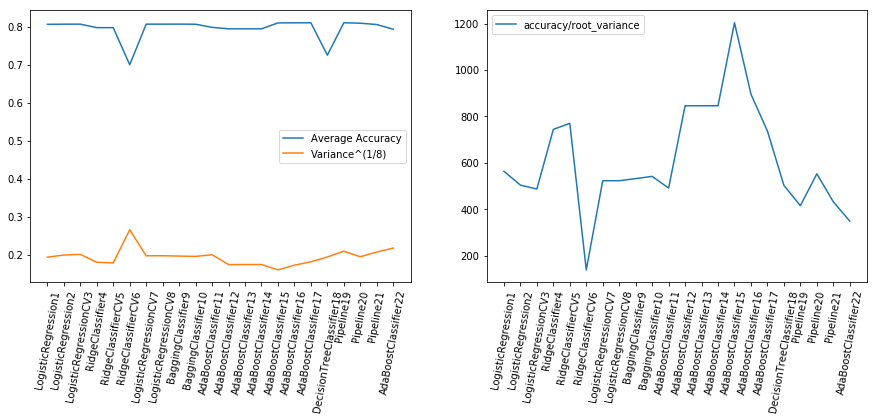

,Time_Stamp,Metric,Metric(Avg.),Variance,CI(+/-),Remark,stored model
Model,,,,,,,
LogisticRegression1,Mon Aug 5 22:46:12 2019,Accuracy,0.806667,2.047127e-06,0.002862,simple Log REg,"LogisticRegression(C=1.0, class_weight=None, d..."
LogisticRegression2,Mon Aug 5 22:47:18 2019,Accuracy,0.806991,2.562949e-06,0.003202,simple Log REg w/o Ref.No,"LogisticRegression(C=1.0, class_weight=None, d..."
LogisticRegressionCV3,Mon Aug 5 22:50:10 2019,Accuracy,0.807037,2.743000e-06,0.003312,simple LogREg CV w/o Ref.No,"LogisticRegressionCV(Cs=10, class_weight=None,..."
RidgeClassifier4,Mon Aug 5 22:56:36 2019,Accuracy,0.797870,1.149945e-06,0.002145,ridge,"RidgeClassifier(alpha=1.0, class_weight=None, ..."
RidgeClassifierCV5,Mon Aug 5 22:56:57 2019,Accuracy,0.797824,1.072775e-06,0.002071,ridgecv,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10..."
RidgeClassifierCV6,Mon Aug 5 23:02:54 2019,Accuracy,0.700232,2.534515e-05,0.010069,class_weight=balanced,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10..."
LogisticRegressionCV7,Mon Aug 5 23:09:37 2019,Accuracy,0.807037,2.380384e-06,0.003086,liblinear,"LogisticRegressionCV(Cs=10, class_weight=None,..."
LogisticRegressionCV8,Mon Aug 5 23:09:58 2019,Accuracy,0.807037,2.380384e-06,0.003086,saga,"LogisticRegressionCV(Cs=10, class_weight=None,..."
BaggingClassifier9,Mon Aug 5 23:26:53 2019,Accuracy,0.807130,2.301062e-06,0.003034,default bagged log,"(LogisticRegression(C=1.0, class_weight=None, ..."


In [197]:

Final_report=pd.DataFrame(report,columns=['Time_Stamp','Model', 'Metric', 'Metric(Avg.)', 'Variance', 'CI(+/-)','Remark','stored model'])
Final_report.set_index("Model",inplace=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(Final_report.index,Final_report['Metric(Avg.)'],label='Average Accuracy')
plt.plot(Final_report.index,np.sqrt(np.sqrt(np.sqrt(Final_report['Variance']))),label='Variance^(1/8)')
plt.xticks(rotation=80)
plt.legend()

plt.subplot(122)
plt.plot(Final_report.index,Final_report['Metric(Avg.)']/np.sqrt(Final_report['Variance']),label='accuracy/root_variance')
plt.xticks(rotation=80)
plt.legend()

plt.show()

Final_report

In [186]:
report=report[:-1]
n=n-1

In [182]:
Final_report.loc['AdaBoostClassifier15','stored model']

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]),
                                                    class_weight=None, cv=None,
                                                    fit_intercept=True,
                                                    normalize=False,
                                                    scoring=None,
                                                    store_cv_values=False),
                   learning_rate=0.2, n_estimators=50, random_state=None)

In [198]:
Final_report.to_clipboard()